In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, color, transform
from skimage.io import imread_collection, imshow

In [3]:
!pip install scikit-image

   ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/12.8 MB 2.6 MB/s eta 0:00:05
    --------------------------------------- 0.2/12.8 MB 2.1 MB/s eta 0:00:07
    --------------------------------------- 0.3/12.8 MB 2.4 MB/s eta 0:00:06
   - -------------------------------------- 0.5/12.8 MB 2.6 MB/s eta 0:00:05
   - -------------------------------------- 0.6/12.8 MB 2.7 MB/s eta 0:00:05
   -- ------------------------------------- 0.7/12.8 MB 2.7 MB/s eta 0:00:05
   -- ------------------------------------- 1.0/12.8 MB 2.9 MB/s eta 0:00:05
   --- ------------------------------------ 1.1/12.8 MB 3.0 MB/s eta 0:00:04
   ---- ----------------------------------- 1.3/12.8 MB 3.1 MB/s eta 0:00:04
   ---- ----------------------------------- 1.5/12.8 MB 3.1 MB/s eta 0:00:04
   ----- ---------------------------------- 1.6/12.8 MB 3.3 MB/s eta 0:00:04
   ----- ---------------------------------- 1.7/12.8 MB 3.0 MB/s eta 0:00:04
   ---

In [5]:
def generate_synthetic_images():
    categories = ['palm', 'fist', 'thumbs_up']
    num_images = 100
    image_size = (64, 64)
    images = []
    labels = []

    for label, category in enumerate(categories):
        for _ in range(num_images):
            img = data.binary_blobs(length=64, blob_size_fraction=0.1, n_dim=2).astype(np.float32)
            img = transform.resize(img, image_size, mode='reflect')
            images.append(img)
            labels.append(label)
    
    images = np.array(images)
    labels = np.array(labels)
    return images, labels, categories

In [6]:
images, labels, categories = generate_synthetic_images()

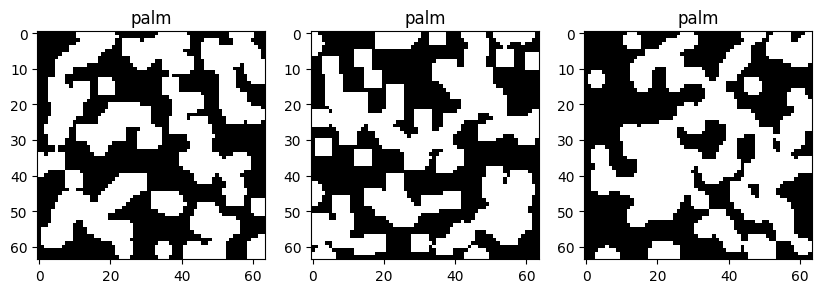

In [7]:
fig, axes = plt.subplots(1, 3, figsize=(10, 5))
for ax, img, label in zip(axes, images[:3], labels[:3]):
    ax.imshow(img, cmap='gray')
    ax.set_title(categories[label])
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [9]:
n_samples, h, w = images.shape
X = images.reshape((n_samples, -1))
y = labels

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
svm_clf = make_pipeline(StandardScaler(), SVC(kernel='linear', C=1))

In [12]:
svm_clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=1, kernel='linear'))])

In [13]:
y_pred = svm_clf.predict(X_test)

In [14]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 33.33%


In [15]:
from sklearn.metrics import classification_report

In [16]:
print(classification_report(y_test, y_pred, target_names=categories))

              precision    recall  f1-score   support

        palm       0.42      0.36      0.39        22
        fist       0.26      0.44      0.33        16
   thumbs_up       0.36      0.23      0.28        22

    accuracy                           0.33        60
   macro avg       0.35      0.34      0.33        60
weighted avg       0.35      0.33      0.33        60

